In [104]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

from scipy.io import loadmat
from scipy.ndimage import imread

from skimage import data, io, filters

from sklearn.svm import SVC

In [105]:
def reshape_4d_2d(orig_arr):
    # reshape image arrays from 4D to 2D (image x height-width-rgb)
    if len(orig_arr.shape) > 2:
        num_imgs, height, width, rgb = orig_arr.shape
        new_arr = orig_arr.reshape(num_imgs, height*width*rgb)
        return new_arr
    else:
        return orig_arr

# Training Data

In [106]:
train_mat = 'data/train_32x32.mat'
train_32 = loadmat(train_mat)

# list of numpy arrays of digit pixels {io.imshow(x_train[i])}
x_train = np.rollaxis(train_32['X'], -1) 

# responses for x_train
y_train = train_32['y'].ravel() 

# reshape array to 2D
x_train2d = reshape_4d_2d(x_train)

# Testing Data

In [107]:
test_mat = 'data/test_32x32.mat'
test_32 = loadmat(test_mat)

# list of numpy arrays of digit pixels {io.imshow(x_test[i])}
x_test = np.rollaxis(test_32['X'], -1)

# response for x_test
y_test = test_32['y'].ravel() 

# reshape array to 2D
x_test2d = reshape_4d_2d(x_test)

# Limit data for early exploration

In [109]:
image_limiter = 1000

assert len(x_train2d.shape) == 2
assert len(x_test2d.shape) == 2

x_train2d = x_train2d[:image_limiter]
y_train = y_train[:image_limiter]

print('X Shape: {0}'.format(x_train2d.shape))
print('Y Shape: {0}'.format(y_train.shape))

X Shape: (1000, 3072)
Y Shape: (1000,)


# Support Vector Machine

In [111]:
svm_clf = SVC(gamma=0.001, C=100.)
svm_mdl = svm_clf.fit(x_train2d[:-1], y_train[:-1])  

In [113]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, svm_mdl.predict(x_test2d))

0.19587430854333129

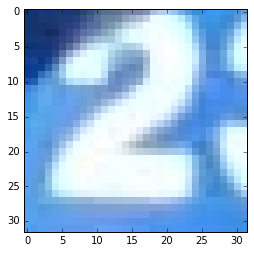

In [62]:
plt.imshow(b, cmap=plt.cm.gray_r, interpolation='nearest')

In [ ]:
from os import listdir
from os.path import isfile, join
mypath = 'data/test'
# return files from path specified
images = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [ ]:
json = images[-4]